# Fisher for Planck
In this notebook we will obtain Fisher matrices using Planck data (covariance matrix or (lite) clik likelihood), and emphasize that the Fisher estimate depends on the point where it is estimated.
All computations presented in this notebook can be run transparently in parallel, with MPI.

## Comparing Fisher based on Planck covariance matrix and based on Planck (lite) clik likelihood

In [1]:
from desilike import Fisher, setup_logging
from desilike.likelihoods.cmb import BasePlanck2018GaussianLikelihood, TTHighlPlanck2018PlikLiteLikelihood, TTTEEEHighlPlanck2018PlikLiteLikelihood, TTLowlPlanck2018ClikLikelihood,\
                                     EELowlPlanck2018ClikLikelihood, LensingPlanck2018ClikLikelihood 
from desilike.likelihoods import SumLikelihood
from desilike.theories.primordial_cosmology import Cosmoprimo

setup_logging()
cosmo = Cosmoprimo(fiducial='DESI')
likelihood_covmat = BasePlanck2018GaussianLikelihood(cosmo=cosmo, basename='base_plikHM_TTTEEE_lowl_lowE_lensing')
# This likelihood is based on the tabulated covariance matrices Planck provided
# The Fisher computation is therefore independent of the point where it is computed
precision_covmat = Fisher(likelihood_covmat)()

[000000.01] [0/1] 01-22 09:47  ParameterCovariance       INFO     Loading stats file: /home/adematti/.local/data/BasePlanck2018GaussianLikelihood/base/plikHM_TTTEEE_lowl_lowE_lensing/dist/base_plikHM_TTTEEE_lowl_lowE_lensing.margestats.
[000000.47] [0/1] 01-22 09:47  absl                      INFO     Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
[000000.47] [0/1] 01-22 09:47  absl                      INFO     Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
[000000.47] [0/1] 01-22 09:47  absl                      INFO     Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
[000000.48] [0/1] 01-22 09:47  absl                      INFO     Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
[000000.48] [0/1] 01-22 09:47  absl                      WARNING  No GPU/TPU found, falling back to CP

In [2]:
# Now let's turn to Planck (lite) clik likelihoods
likelihoods = [Likelihood(cosmo=cosmo) for Likelihood in [TTTEEEHighlPlanck2018PlikLiteLikelihood, TTLowlPlanck2018ClikLikelihood,\
                                                          EELowlPlanck2018ClikLikelihood, LensingPlanck2018ClikLikelihood]]
likelihood_clik = SumLikelihood(likelihoods=likelihoods)
fisher_clik = Fisher(likelihood_clik)
# Planck covariance matrix used above should roughly correspond to Fisher at the Planck posterior bestfit
# at which logA ~= 3.044 (instead of logA = ln(1e10 2.0830e-9) = 3.036 assumed in the DESI fiducial cosmology)
precision_clik = fisher_clik(logA=3.044)

 Initializing Planck likelihood, version Plik_v22_cmbonly_like                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
[000004.54] [0/1] 01-22 09:47  Differentiation           INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'n_s', 'tau_reio', 'A_planck'].
[000004.56] [0/1] 01-22 09:47  Differentiation           INFO     Using auto-differentiation for parameter h.
[000004.57] [0/1] 01-22 09:47  Differentiation           INFO     Using auto-differentiation for parameter omega_cdm.
[000004.59] [0/1] 01-22 09:47  Differentiation           INFO     Using aut

/home/adematti/Bureau/DESI/NERSC/cosmodesi/desilike/desilike/base.py:133: UserWarning: Derived parameter loglikelihood of EELowlPlanck2018ClikLikelihood is already derived in LensingPlanck2018ClikLikelihood.
  warnings.warn(msg)
/home/adematti/Bureau/DESI/NERSC/cosmodesi/desilike/desilike/base.py:133: UserWarning: Derived parameter logprior of EELowlPlanck2018ClikLikelihood is already derived in LensingPlanck2018ClikLikelihood.
  warnings.warn(msg)
/home/adematti/Bureau/DESI/NERSC/cosmodesi/desilike/desilike/base.py:133: UserWarning: Derived parameter loglikelihood of TTLowlPlanck2018ClikLikelihood is already derived in EELowlPlanck2018ClikLikelihood.
  warnings.warn(msg)
/home/adematti/Bureau/DESI/NERSC/cosmodesi/desilike/desilike/base.py:133: UserWarning: Derived parameter logprior of TTLowlPlanck2018ClikLikelihood is already derived in EELowlPlanck2018ClikLikelihood.
  warnings.warn(msg)
/home/adematti/Bureau/DESI/NERSC/cosmodesi/desilike/desilike/base.py:133: UserWarning: Derived p

[000004.71] [0/1] 01-22 09:47  Differentiation           INFO     Using auto-differentiation for parameter A_planck.
[000010.47] [0/1] 01-22 09:47  Differentiation           INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'n_s', 'tau_reio', 'A_planck'].
[000016.41] [0/1] 01-22 09:47  Differentiation           INFO     Using finite-differentiation for parameter h.
[000022.21] [0/1] 01-22 09:47  Differentiation           INFO     Using finite-differentiation for parameter omega_cdm.
[000028.09] [0/1] 01-22 09:47  Differentiation           INFO     Using finite-differentiation for parameter omega_b.
[000034.22] [0/1] 01-22 09:47  Differentiation           INFO     Using finite-differentiation for parameter logA.
[000040.79] [0/1] 01-22 09:47  Differentiation           INFO     Using finite-differentiation for parameter n_s.
[000047.44] [0/1] 01-22 09:47  Differentiation           INFO     Using finite-differentiation for parameter tau_reio.
[000060.57] [0/1] 01-22 09:48 

[000737.00] [0/1] 01-22 09:59  numexpr.utils             INFO     NumExpr defaulting to 8 threads.


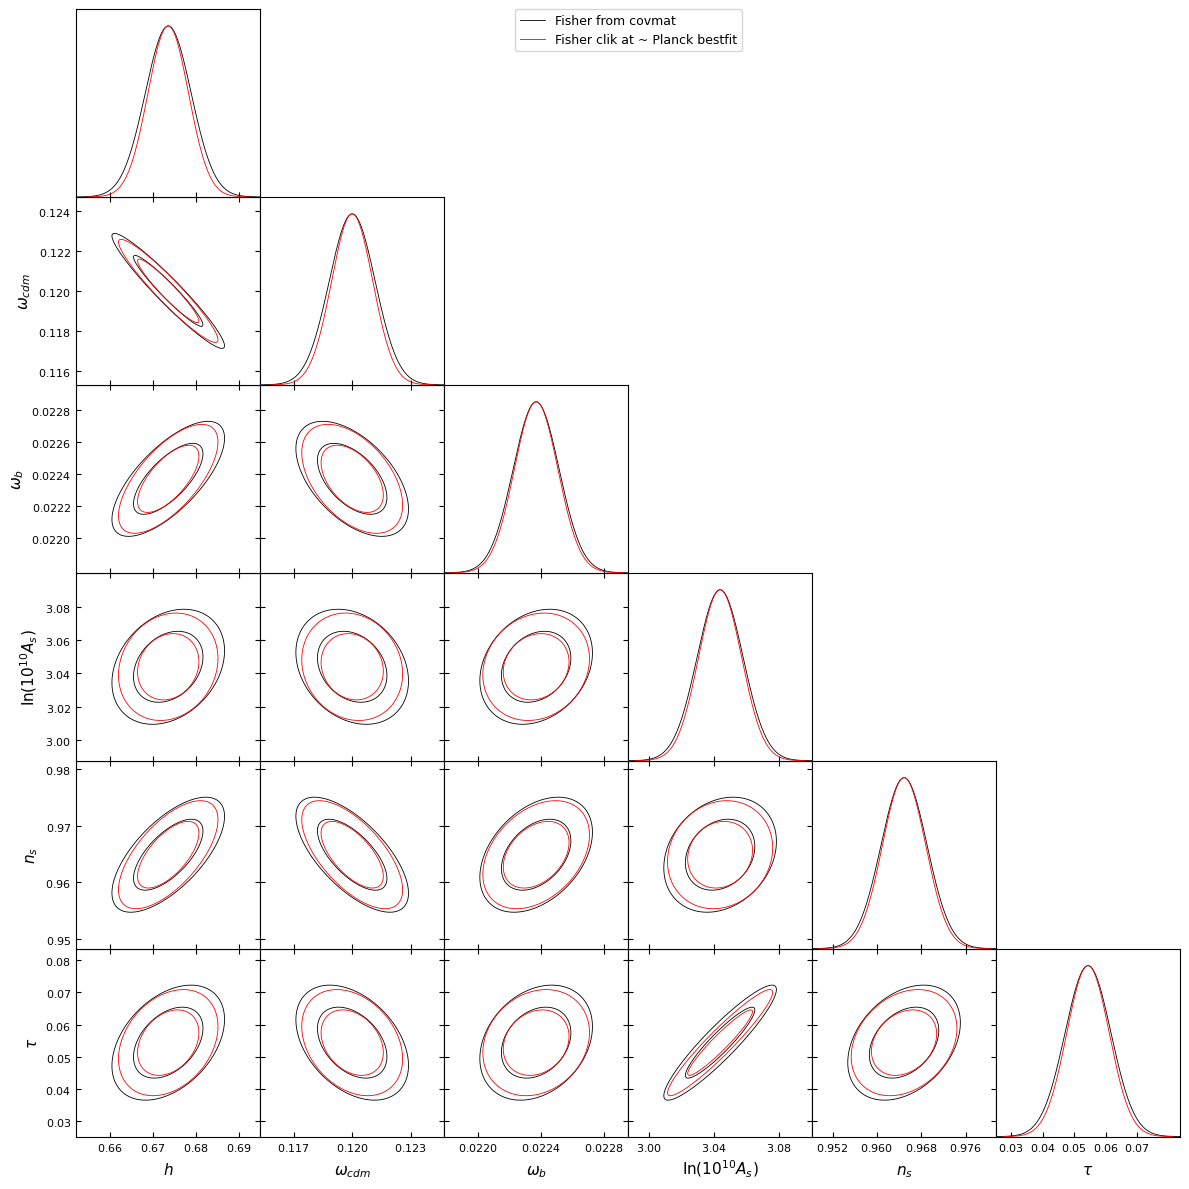

In [3]:
from desilike.samples import plotting
covmat = precision_covmat.clone(center=precision_clik.center(precision_covmat.params())).to_covariance()
plotting.plot_triangle([covmat, precision_clik.to_covariance()], labels=['Fisher from covmat', 'Fisher clik at ~ Planck bestfit'])
# Match isn't too bad... Remaining differences can be attributed to the fact we are not exactly at the Planck bestfit,
# or more broadly speaking the Planck posterior is not exactly Gaussian in its parameters.

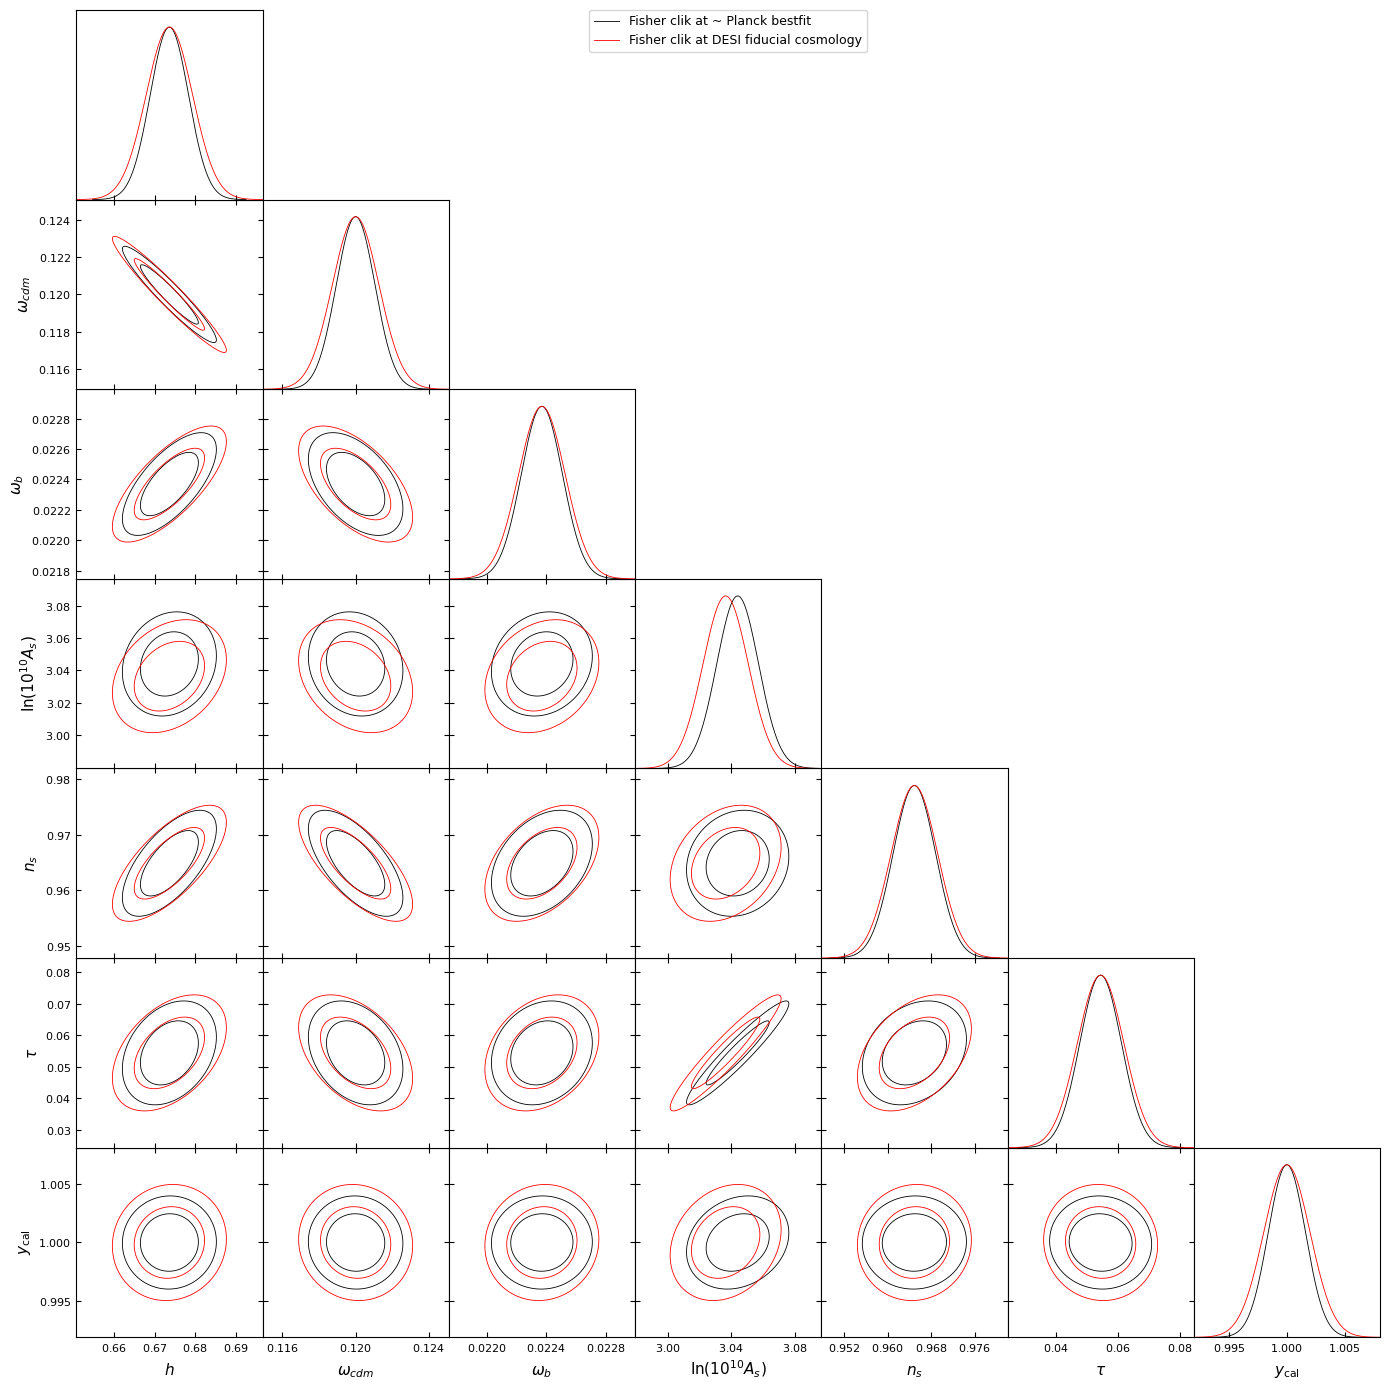

In [4]:
# If, e.g. we had chosen the DESI fiducial cosmology as a center point
precision_clik_desi = fisher_clik(**{param.name: param.value for param in likelihood_clik.varied_params})
plotting.plot_triangle([precision_clik.to_covariance(), precision_clik_desi.to_covariance()], labels=['Fisher clik at ~ Planck bestfit', 'Fisher clik at DESI fiducial cosmology'])

## $w_{0}$

In [5]:
for param in likelihood_clik.all_params.select(name=['w0_fld']):
    param.update(fixed=False)

fisher_clik = Fisher(likelihood_clik)
precision_clik_extended = fisher_clik()

[001500.24] [0/1] 01-22 10:12  Differentiation           INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'n_s', 'tau_reio', 'w0_fld', 'A_planck'].
[001500.26] [0/1] 01-22 10:12  Differentiation           INFO     Using auto-differentiation for parameter h.
[001500.28] [0/1] 01-22 10:12  Differentiation           INFO     Using auto-differentiation for parameter omega_cdm.
[001500.31] [0/1] 01-22 10:12  Differentiation           INFO     Using auto-differentiation for parameter omega_b.
[001500.33] [0/1] 01-22 10:12  Differentiation           INFO     Using auto-differentiation for parameter logA.
[001500.35] [0/1] 01-22 10:12  Differentiation           INFO     Using auto-differentiation for parameter n_s.
[001500.38] [0/1] 01-22 10:12  Differentiation           INFO     Using auto-differentiation for parameter tau_reio.
[001500.40] [0/1] 01-22 10:12  Differentiation           INFO     Using auto-differentiation for parameter w0_fld.
[001500.42] [0/1] 01-22 10:12  Dif

/home/adematti/Bureau/DESI/NERSC/cosmodesi/desilike/desilike/base.py:133: UserWarning: Derived parameter loglikelihood of EELowlPlanck2018ClikLikelihood is already derived in LensingPlanck2018ClikLikelihood.
  warnings.warn(msg)
/home/adematti/Bureau/DESI/NERSC/cosmodesi/desilike/desilike/base.py:133: UserWarning: Derived parameter logprior of EELowlPlanck2018ClikLikelihood is already derived in LensingPlanck2018ClikLikelihood.
  warnings.warn(msg)
/home/adematti/Bureau/DESI/NERSC/cosmodesi/desilike/desilike/base.py:133: UserWarning: Derived parameter loglikelihood of TTLowlPlanck2018ClikLikelihood is already derived in EELowlPlanck2018ClikLikelihood.
  warnings.warn(msg)
/home/adematti/Bureau/DESI/NERSC/cosmodesi/desilike/desilike/base.py:133: UserWarning: Derived parameter logprior of TTLowlPlanck2018ClikLikelihood is already derived in EELowlPlanck2018ClikLikelihood.
  warnings.warn(msg)
/home/adematti/Bureau/DESI/NERSC/cosmodesi/desilike/desilike/base.py:133: UserWarning: Derived p

[001500.47] [0/1] 01-22 10:12  Differentiation           INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'n_s', 'tau_reio', 'w0_fld', 'A_planck'].
[001507.43] [0/1] 01-22 10:12  Differentiation           INFO     Using finite-differentiation for parameter h.
[001514.88] [0/1] 01-22 10:12  Differentiation           INFO     Using finite-differentiation for parameter omega_cdm.
[001522.42] [0/1] 01-22 10:12  Differentiation           INFO     Using finite-differentiation for parameter omega_b.
[001529.97] [0/1] 01-22 10:12  Differentiation           INFO     Using finite-differentiation for parameter logA.
[001537.41] [0/1] 01-22 10:12  Differentiation           INFO     Using finite-differentiation for parameter n_s.
[001544.84] [0/1] 01-22 10:12  Differentiation           INFO     Using finite-differentiation for parameter tau_reio.
[001551.94] [0/1] 01-22 10:12  Differentiation           INFO     Using finite-differentiation for parameter w0_fld.
[001566.43] [0/1] 01

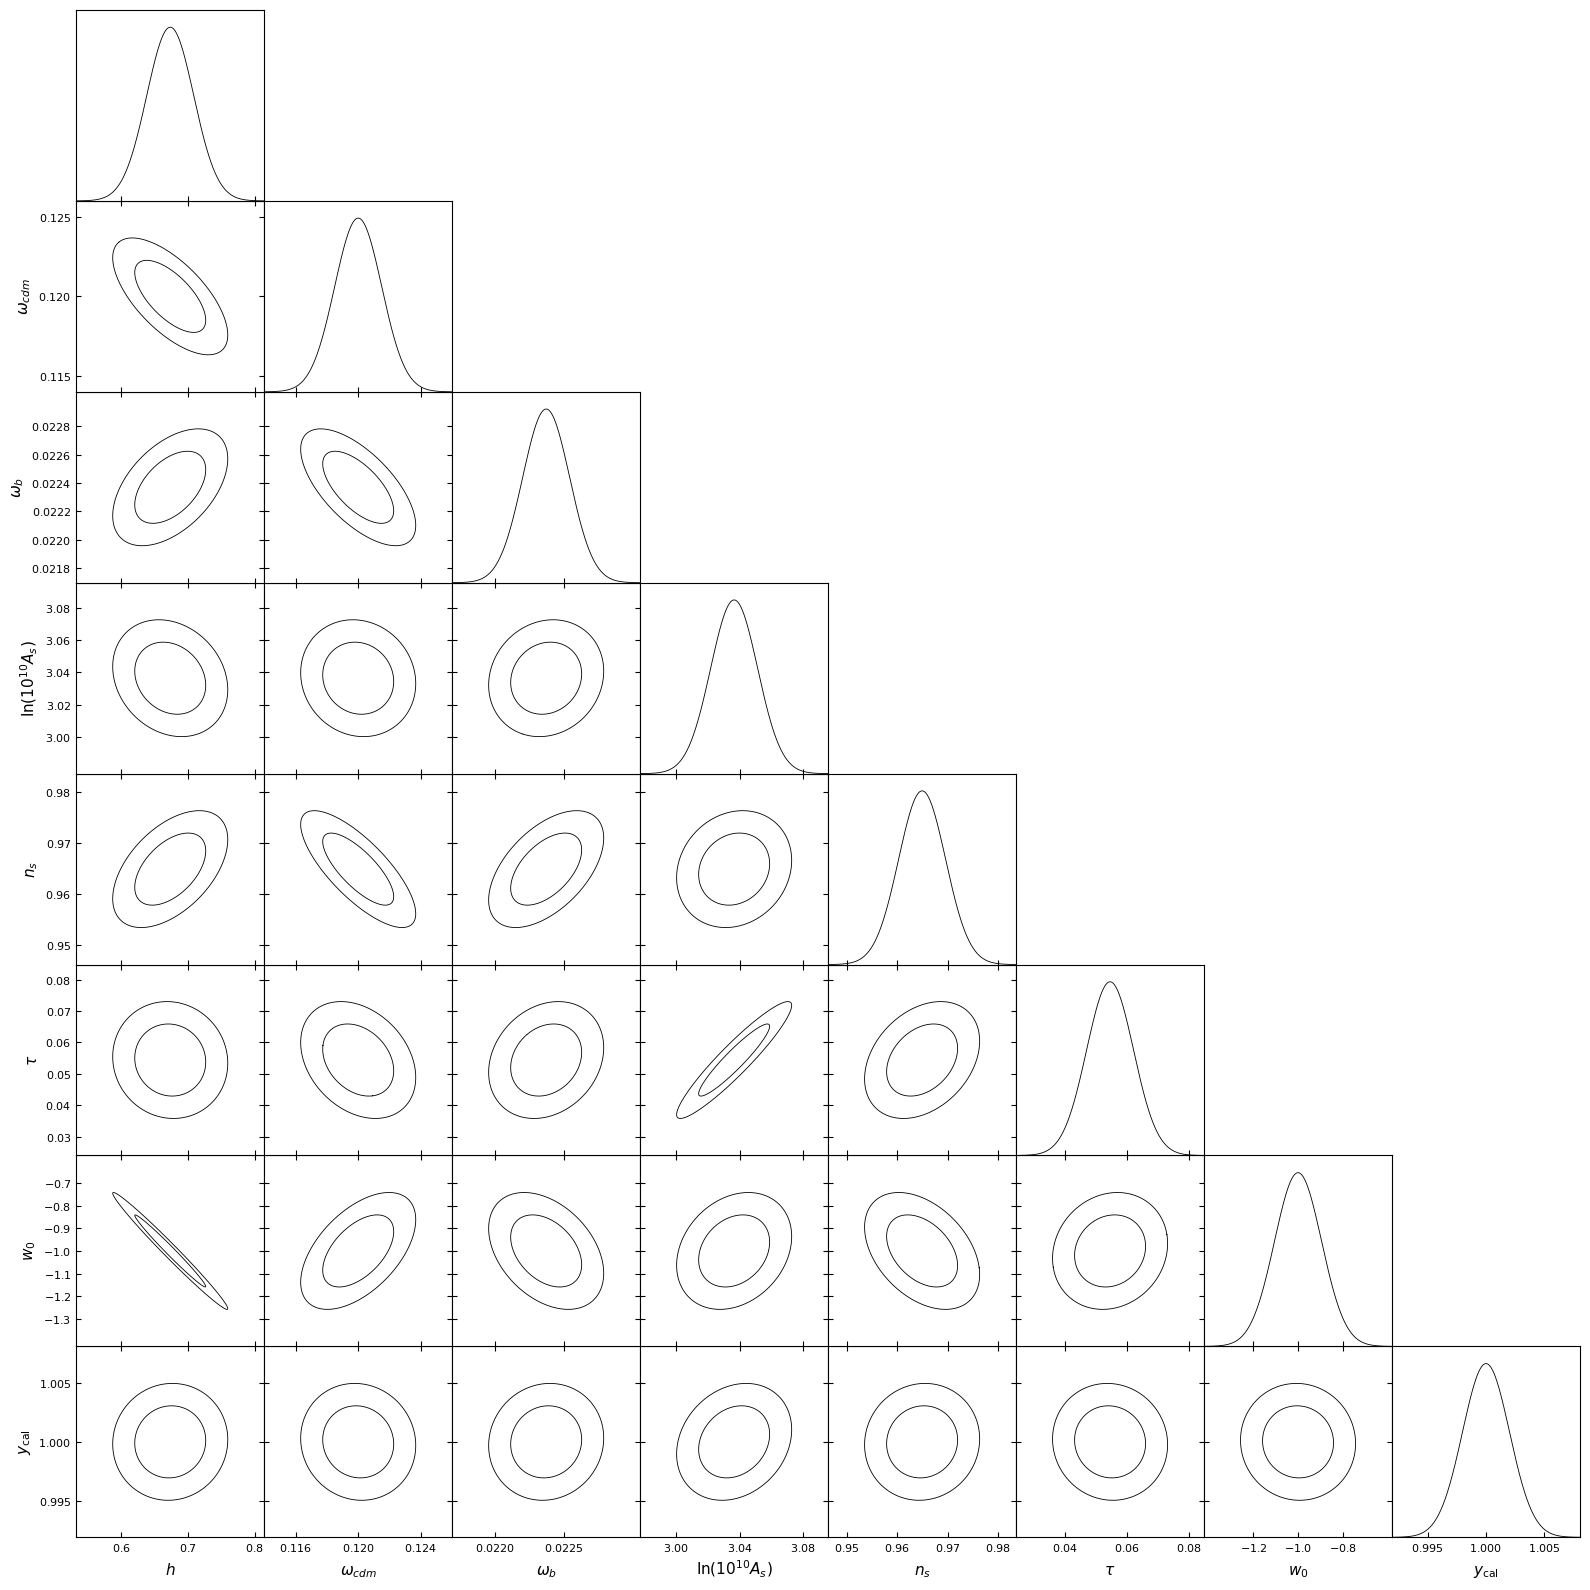

In [6]:
plotting.plot_triangle(precision_clik_extended.to_covariance())
#print(precision_clik_extended.to_covariance().to_stats(tablefmt='pretty'))

## Comparing Fisher with chains (+ Taylor expansion)

In [8]:
for param in likelihood_clik.all_params.select(name=['w0_fld']):
    param.update(fixed=True)
# Let us emulate theory Cl's to avoid running chains for hours
from desilike.emulators import Emulator, EmulatedCalculator, TaylorEmulatorEngine

for likelihood in likelihoods:
    emulator = Emulator(likelihood.theory, engine=TaylorEmulatorEngine(order=1))
    emulator.set_samples()
    emulator.fit()
    likelihood.init.update(theory=emulator.to_calculator())

[002580.39] [0/1] 01-22 10:30  Emulator                  INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'n_s', 'tau_reio'].
[002580.39] [0/1] 01-22 10:30  Emulator                  INFO     Found varying ['tt', 'ee', 'te'] and fixed ['requested_cls', 'unit'] outputs.
[002580.40] [0/1] 01-22 10:30  Differentiation           INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'n_s', 'tau_reio'].
[002618.75] [0/1] 01-22 10:30  Differentiation           INFO     Using finite-differentiation for parameter h.
[002626.25] [0/1] 01-22 10:30  Differentiation           INFO     Using finite-differentiation for parameter omega_cdm.
[002633.74] [0/1] 01-22 10:30  Differentiation           INFO     Using finite-differentiation for parameter omega_b.
[002641.21] [0/1] 01-22 10:31  Differentiation           INFO     Using finite-differentiation for parameter logA.
[002648.70] [0/1] 01-22 10:31  Differentiation           INFO     Using finite-differentiation for parame

In [10]:
from desilike.samplers import ZeusSampler

sampler = ZeusSampler(likelihood_clik, seed=42)
chains = sampler.run(check={'max_eigen_gr': 0.05})

[003463.36] [0/1] 01-22 10:44  ZeusSampler               INFO     Varied parameters: ['h', 'omega_cdm', 'omega_b', 'logA', 'n_s', 'tau_reio', 'A_planck'].


/home/adematti/Bureau/DESI/NERSC/cosmodesi/desilike/desilike/base.py:133: UserWarning: Derived parameter loglikelihood of EELowlPlanck2018ClikLikelihood is already derived in LensingPlanck2018ClikLikelihood.
  warnings.warn(msg)
/home/adematti/Bureau/DESI/NERSC/cosmodesi/desilike/desilike/base.py:133: UserWarning: Derived parameter logprior of EELowlPlanck2018ClikLikelihood is already derived in LensingPlanck2018ClikLikelihood.
  warnings.warn(msg)
/home/adematti/Bureau/DESI/NERSC/cosmodesi/desilike/desilike/base.py:133: UserWarning: Derived parameter loglikelihood of TTLowlPlanck2018ClikLikelihood is already derived in EELowlPlanck2018ClikLikelihood.
  warnings.warn(msg)
/home/adematti/Bureau/DESI/NERSC/cosmodesi/desilike/desilike/base.py:133: UserWarning: Derived parameter logprior of TTLowlPlanck2018ClikLikelihood is already derived in EELowlPlanck2018ClikLikelihood.
  warnings.warn(msg)
/home/adematti/Bureau/DESI/NERSC/cosmodesi/desilike/desilike/base.py:133: UserWarning: Derived p

[003464.46] [0/1] 01-22 10:44  root                      INFO     Initialising ensemble of 18 walkers...
[004625.02] [0/1] 01-22 11:04  ZeusSampler               INFO     Diagnostics:
[004625.03] [0/1] 01-22 11:04  ZeusSampler               INFO     - max eigen Gelman-Rubin - 1 is 0.675; not < 0.05.
[004625.04] [0/1] 01-22 11:04  ZeusSampler               INFO     - max diag Gelman-Rubin - 1 is 0.0774.
[004625.07] [0/1] 01-22 11:04  ZeusSampler               INFO     - max diag Gelman-Rubin - 1 at 1.0 sigmas is 0.185.
[004625.08] [0/1] 01-22 11:04  ZeusSampler               INFO     - max Geweke is 0.447.
[004625.08] [0/1] 01-22 11:04  ZeusSampler               INFO     - Geweke p-value is 0.494.
[004625.12] [0/1] 01-22 11:04  ZeusSampler               INFO     - (150 iterations / integrated autocorrelation time) is 16.9.
[004625.83] [0/1] 01-22 11:04  root                      INFO     Initialising ensemble of 18 walkers...
[005710.52] [0/1] 01-22 11:22  ZeusSampler               INFO

Removed no burn in


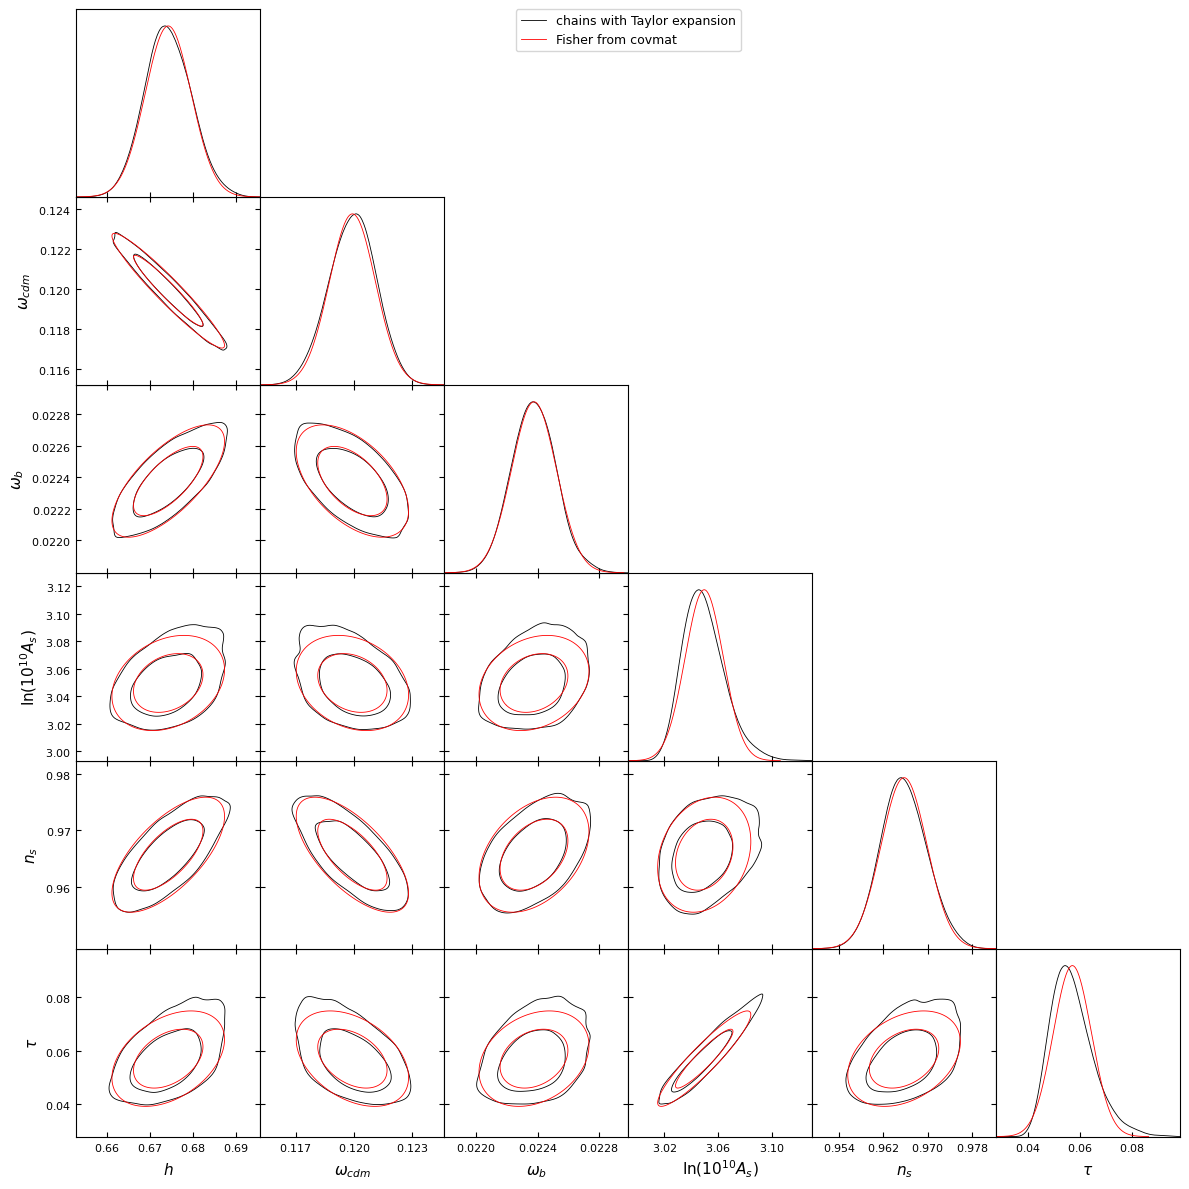

In [14]:
samples = chains[0].remove_burnin(0.5)
# ln(10^{10}A_s) of 'DESI' fiducial is ln(10^10 2.0830e-9), which is not the center of Planck likelihoods
# hack: move Fisher so it appeared centered
covariance = precision_covmat.to_covariance().clone(center=samples.mean(precision_covmat.params()))
plotting.plot_triangle([samples, covariance],
                       labels=['chains with Taylor expansion', 'Fisher from covmat'])